In [1]:
#Import dependencies
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = 'C:/Users/sfand/Desktop/python_work/BC'

In [3]:
#Import and load the file
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
#Check the lenght of the file
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [9]:
kaggle_metadata.sample(n=3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1082,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,102461,tt0113057,fr,La fille seule,A young Parisian must make major decisions abo...,...,1995-05-29,0.0,90.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,A Single Girl,False,6.8,8.0
20559,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,42455,tt0069715,es,And Now The Screaming Starts,"In the late 18th century, two newlyweds move i...",...,1973-04-26,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Technicolor film set in a ghostly gothic man...,And Now The Screaming Starts,False,6.4,12.0
3519,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,28974,tt0014624,en,A Woman of Paris: A Drama of Fate,When Marie St. Clair believes she has been jil...,...,1923-10-01,0.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Woman of Paris,False,7.1,17.0


In [10]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
21364488,221880,253,4.5,1256743107
4495700,46179,1586,3.5,1182795373
25560958,266027,2732,3.5,1065803513
7136520,73596,2396,2.0,1082521903
9188259,94877,704,5.0,946803727


In [11]:
#Converting wiki_movies_raw in a dataframe
#because it is a list of dicts, we don’t need to do anything else other than send it to the DataFrame function.
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [12]:
#Check the data.
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#To see all of the column names that were imported
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [14]:
#Why the columns were removed?? Because the data that was dropped had info in those extra columns?
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [15]:
#Converting wiki_movies to a dataframe to check the columns
wiki_movies_df = pd.DataFrame(wiki_movies)

In [16]:
#print the data frame
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Print the columns in a list
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

In [18]:
#drop addtional columns
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [19]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [20]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [21]:
wiki_movies_df[wiki_movies_df['Adaptation by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
536,https://en.wikipedia.org/wiki/The_Last_of_the_...,1992,https://www.imdb.com/title/tt0104691/,The Last of the Mohicans,Michael Mann,"[Michael Mann, Hunt Lowry]","[Michael Mann, Christopher Crowe]",NaN,"[The Last of the Mohicans, by, James Fenimore ...","[Daniel Day-Lewis, Madeleine Stowe, Jodhi May]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,https://en.wikipedia.org/wiki/The_Nightmare_Be...,1993,https://www.imdb.com/title/tt0107688/,The Nightmare Before Christmas,Henry Selick,"[Tim Burton, Denise Di Novi]",Caroline Thompson,NaN,"[Story and characters, by Tim Burton]","[Danny Elfman, Chris Sarandon, Catherine O'Har...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

In [23]:
#declare a function
def clean_movie(movie):
    movie = dict(movie) #Create a non-destructive copy.
    alt_titles = {} #Make an empty dict to  to hold all of the alternative titles.
    #loop through a list of all alternative title keys.
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        #Check if the current key exists in the movie object.
        #If so, remove the key-value pair and add to the alternative titles dictionary.
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    #After looping through every key, add the alternative titles dict to the movie object.
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
        
        # merge column names/consolidate columns
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie

In [24]:
#We can make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

#Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [25]:
#Removing duplicates with help of regular expressions (regex)
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [26]:
#count of null values for each column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [27]:
#a list of columns that have less than 90% null values and use those to trim down our dataset.
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [28]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

In [29]:
box_office = wiki_movies_df['Box office'].dropna()

In [30]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

In [31]:
#Regular expressions only work on strings - convert all to a string.
#def is_not_a_string(x):
#    return type(x) != str
#box_office[box_office.map(is_not_a_string)]

#Write the function above as lambda function:
box_office[box_office.map(lambda x: type(x) != str)]


34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [32]:
#use a simple space as our joining character and apply the join() function only when our data points are lists
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [38]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [39]:
#RegEx for box office column to remove any unwanted characters before acctual number
#creating first form 
form_one = r'\$\d+\.?\d*\s*[mb]illion'

#Add constrains to ingnore case letters (str.constrains + flags=re.IGNORECASE) and to count all findings .sum()
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [41]:
#RegEx for box office column to remove any unwanted characters before acctual number
#creating second form 
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [42]:
#Most of the box office values are described by either form. Now we want to see which values aren't described by either. 
#To be safe, we should see if any box office values are described by both.
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

#Use Pandas snytax to call "not" wit "~" 
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [57]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
#wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [58]:
budget = wiki_movies_df['Budget'].dropna()
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

KeyError: 'Budget'

In [59]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [61]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
#wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [64]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [65]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [66]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [67]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [68]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [69]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [70]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [72]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [73]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [75]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [76]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [77]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [84]:
kaggle_metadata['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [85]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [86]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [88]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [89]:
kaggle_metadata['video'] == 'True'
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [91]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [92]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [93]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [94]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [95]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

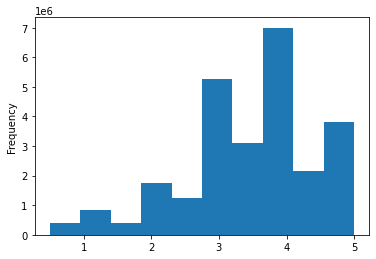

In [96]:
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [97]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [98]:
movies_df.head()

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.2,72.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,1990-08-24,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.5,17.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,1990-08-10,33461269.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.3,146.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,1990-12-25,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.3,57.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,1990-12-21,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.6,23.0


In [99]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop Wikipedia.
# running_time             runtime                  Keep Kaggle; fill in zeros with Wikipedia data.
# budget_wiki              budget_kaggle            Keep Kaggle; fill in zeros with Wikipedia data.
# box_office               revenue                  Keep Kaggle; fill in zeros with Wikipedia data.
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [101]:
movies_df[['title_wiki','title_kaggle']].sample(10)

,title_wiki,title_kaggle
5159,Bullet to the Head,Bullet to the Head
1753,Switchback,Switchback
4839,We Bought a Zoo,We Bought a Zoo
2140,Music of the Heart,Music of the Heart
5435,The Nut Job,The Nut Job
334,The Prince of Tides,The Prince of Tides
135,Night of the Living Dead,Night of the Living Dead
4590,The Perfect Game,The Perfect Game
4634,Twelve,Twelve
4745,In Time,In Time


In [102]:
#Look at the rows where the titles don't match.
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [103]:
#Let's confirm there aren't any missing titles in the Kaggle data with the following code:
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [ ]:
#Drop Wikipedia titles: "title_wiki"


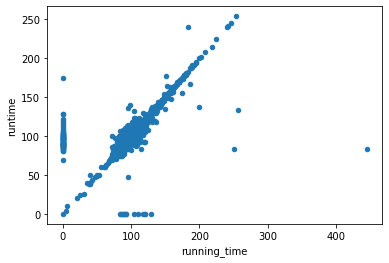

In [104]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

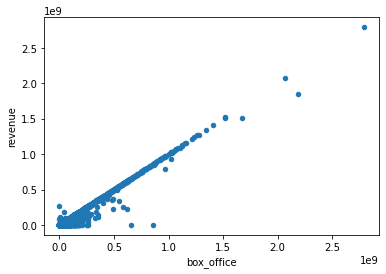

In [105]:
#The box_office and revenue columns are numeric, so we'll make another scatter plot.
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

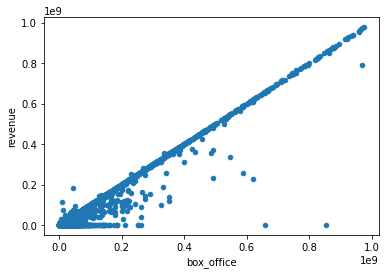

In [106]:
# scatter plot for everything less than $1 billion in box_office.
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

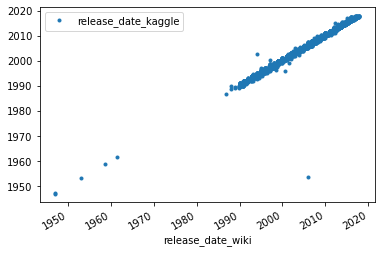

In [107]:
#We'll use the regular line plot (which can plot date data), and change the style to only put dots by adding style='.' to the plot() method:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [108]:
#We should investigate that wild outlier around 2006.
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,30500000.0,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.2,137.0
